In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
from classy import Class
from scipy.interpolate import interp1d

In [12]:
avals = {1e-6,1e-5,1e-4,1e-3,1e-7,1e-8,1e-2}
cosmo = {}

for a in avals:
    cosmo[str(a)]=Class()
    cosmo[str(a)].set({'gauge':'synchronous',
                           'output':'tCl, lCl, mPk, pCl',
                           'omega_cdm':0.12038,
                           'recombination':'recfast',
                           'h':0.67556,
                           'lensing':'yes',
                           'f_bidm':0.99,
                           'm_bidm':100,
                           'bidm_type':'powerlaw',
                           'n_bidm':-4,
                           'a_bidm':a,
                           'A_bidm':1.7e-41,
                           'tight_coupling_trigger_tau_c_over_tau_h':0.002,
                           'tight_coupling_trigger_tau_c_over_tau_k':0.0003,
                           })
    cosmo[str(a)].compute()


In [4]:
ref = Class()
ref.set({'output':'tCl, lCl, mPk, pCl',
        'lensing':'yes'})
ref.compute()

/home/markus/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


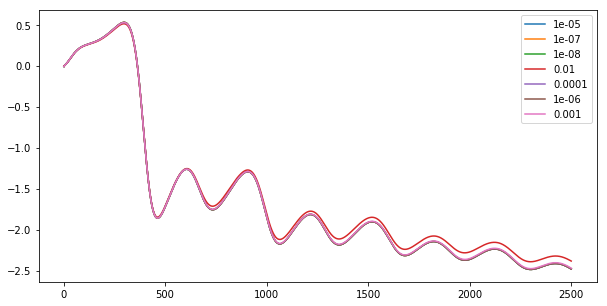

In [13]:
fig = plt.figure(1, figsize = (10,5))
ax = fig.add_subplot(111)
clref = ref.lensed_cl(2500)
TTref = clref['tt']
for a in avals:
    cl = cosmo[str(a)].lensed_cl(2500)
    l = cl['ell']
    TT = cl['tt']
    ax.plot(l,100*(TT-TTref)/TTref, label=a)
ax.legend()

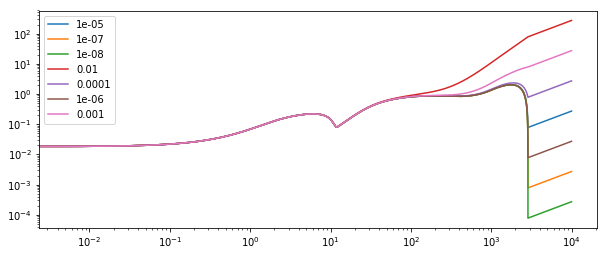

In [14]:
fig = plt.figure(1, figsize = (10,4))
ax = fig.add_subplot(111)
for a in avals:
    Th = cosmo[str(a)].get_thermodynamics()
    ax.loglog(Th['z'],Th['Tbidm [K]'],label=str(a))
ax.legend()

In [15]:
avals = {1e-6,1e-5,1e-4,1e-3,1e-7,1e-8,1e-2}
cosmo = {}

for a in avals:
    cosmo[str(a)]=Class()
    cosmo[str(a)].set({'gauge':'synchronous',
                           'output':'tCl, lCl, mPk, pCl',
                           'omega_cdm':0.12038,
                           'recombination':'recfast',
                           'h':0.67556,
                           'lensing':'yes',
                           'f_bidm':0.99,
                           'm_bidm':100,
                           'bidm_type':'powerlaw',
                           'n_bidm':-4,
                           'a_bidm':a,
                           'A_bidm':1e-38,
                           'tight_coupling_trigger_tau_c_over_tau_h':0.002,
                           'tight_coupling_trigger_tau_c_over_tau_k':0.0003,
                           })
    cosmo[str(a)].compute()

/home/markus/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


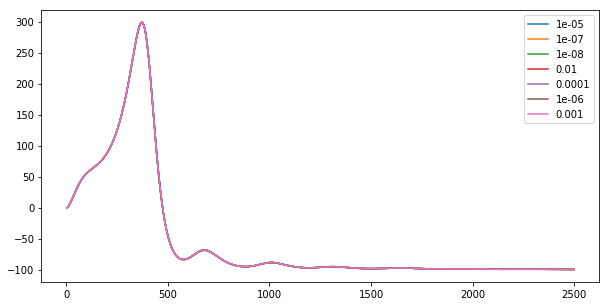

In [16]:
fig = plt.figure(1, figsize = (10,5))
ax = fig.add_subplot(111)
clref = ref.lensed_cl(2500)
TTref = clref['tt']
for a in avals:
    cl = cosmo[str(a)].lensed_cl(2500)
    l = cl['ell']
    TT = cl['tt']
    ax.plot(l,100*(TT-TTref)/TTref, label=a)
ax.legend()

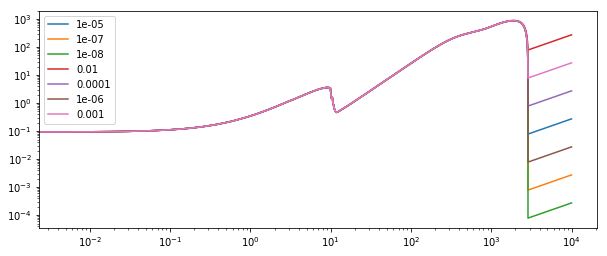

In [17]:
fig = plt.figure(1, figsize = (10,4))
ax = fig.add_subplot(111)
for a in avals:
    Th = cosmo[str(a)].get_thermodynamics()
    ax.loglog(Th['z'],Th['Tbidm [K]'],label=str(a))
ax.legend()

In [2]:
avals = {1e-6,1e-5,1e-4,1e-3,1e-7,1e-8,1e-2}
cosmo = {}

for a in avals:
    cosmo[str(a)]=Class()
    cosmo[str(a)].set({'gauge':'synchronous',
                           'output':'tCl, lCl, mPk, pCl',
                           'omega_cdm':0.12038,
                           'recombination':'recfast',
                           'h':0.67556,
                           'lensing':'yes',
                           'f_bidm':0.99,
                           'm_bidm':100,
                           'bidm_type':'resonance',
                           'a_bidm':a,
                           'epsilon_bidm':3e-11,
                           'A_bidm':3e-5,
                           'tight_coupling_trigger_tau_c_over_tau_h':0.002,
                           'tight_coupling_trigger_tau_c_over_tau_k':0.0003,
                           })
    cosmo[str(a)].compute()

/home/markus/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


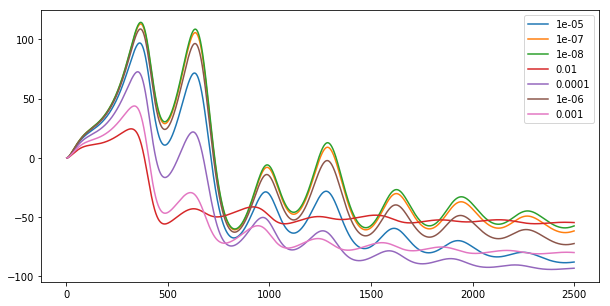

In [5]:
fig = plt.figure(1, figsize = (10,5))
ax = fig.add_subplot(111)
clref = ref.lensed_cl(2500)
TTref = clref['tt']
for a in avals:
    cl = cosmo[str(a)].lensed_cl(2500)
    l = cl['ell']
    TT = cl['tt']
    ax.plot(l,100*(TT-TTref)/TTref, label=a)
ax.legend()

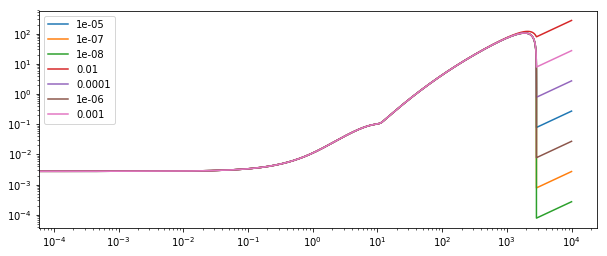

In [6]:
fig = plt.figure(1, figsize = (10,4))
ax = fig.add_subplot(111)
for a in avals:
    Th = cosmo[str(a)].get_thermodynamics()
    ax.loglog(Th['z'],Th['Tbidm [K]'],label=str(a))
ax.legend()

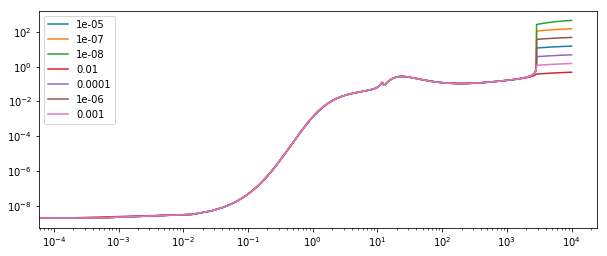

In [10]:
fig = plt.figure(1, figsize = (10,4))
ax = fig.add_subplot(111)
for a in avals:
    Th = cosmo[str(a)].get_thermodynamics()
    H = np.array([cosmo[str(a)].Hubble(zz) for zz in Th['z']])
    ax.loglog(Th['z'],(1+Th['z'])*Th['Rbidm']/H,label=str(a))
ax.legend()

In [14]:
Avals = {1e-6,1e-5,1e-4,1e-3,1e-7,1e-8,1e-2}
cosmo = {}

for A in Avals:
    cosmo[str(A)]=Class()
    cosmo[str(A)].set({'gauge':'synchronous',
                           'output':'tCl, lCl, mPk, pCl',
                           'omega_cdm':0.12038,
                           'recombination':'recfast',
                           'h':0.67556,
                           'lensing':'yes',
                           'f_bidm':0.99,
                           'm_bidm':100,
                           'bidm_type':'resonance',
                           'a_bidm':0.01,
                           'epsilon_bidm':3e-11,
                           'A_bidm':A,
                           'tight_coupling_trigger_tau_c_over_tau_h':0.002,
                           'tight_coupling_trigger_tau_c_over_tau_k':0.0003,
                           })
    cosmo[str(A)].compute()

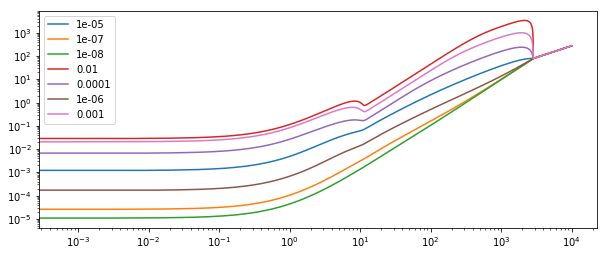

In [15]:
fig = plt.figure(1, figsize = (10,4))
ax = fig.add_subplot(111)
for A in Avals:
    Th = cosmo[str(A)].get_thermodynamics()
    ax.loglog(Th['z'],Th['Tbidm [K]'],label=str(A))
ax.legend()

In [20]:
Th001 = cosmo['0.01'].get_thermodynamics()
T001 = Th001['Tbidm [K]']
Tmax001 = max(T001)
iTmax001 = np.argmax(T001)
zeq = Th001['z'][iTmax001]

In [73]:
Teq = []
As = []
aeq = []

for A in Avals:
    Th = cosmo[str(A)].get_thermodynamics()
    Ti = interp1d(Th['z'],Th['Tbidm [K]'])
    Tbi = interp1d(Th['z'],Th['Tb [K]'])
    #print(str(A) + ' ' + str(max(Th['z'])))
    Teq += [Ti(zeq)]
    Tbi(zeq)
    aeq += [Ti(zeq)/Tbi(zeq)]
    As += [A]

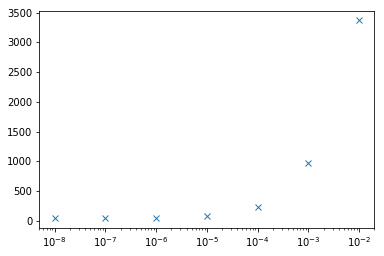

In [36]:
plt.semilogx(As,Teq,'x')

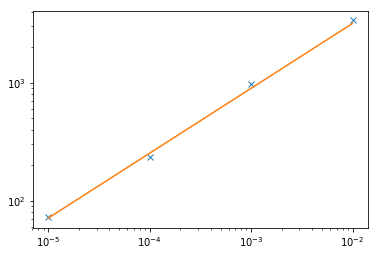

In [67]:
plt.loglog(As[3:7],Teq[3:7],'x')
AAs = np.linspace(1e-5,1e-2,100)
plt.loglog(AAs,AAs**0.55 * 4e4)

In [76]:
As.sort()

In [77]:
Teq.sort()

In [75]:
aeq.sort()

In [71]:
aeq

[0.0074922484666241065,
 0.007543951421202947,
 0.00805149087991597,
 0.012471772217496504,
 0.0398936863576788,
 0.16571411533604855,
 0.5753290154169779]

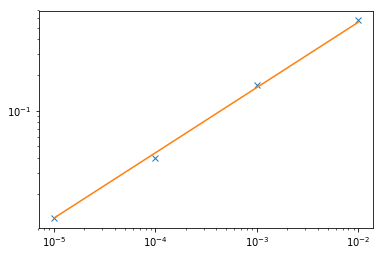

In [85]:
plt.loglog(As[3:7],aeq[3:7],'x')
AAs = np.linspace(1e-5,1e-2,100)
plt.loglog(AAs,AAs**0.55 * 7)

In [86]:
Avals = {1e-6,1e-5,1e-4,1e-3,1e-7,1e-8,1e-2}
cosmo = {}

for A in Avals:
    cosmo[str(A)]=Class()
    cosmo[str(A)].set({'gauge':'synchronous',
                           'output':'tCl, lCl, mPk, pCl',
                           'omega_cdm':0.12038,
                           'recombination':'recfast',
                           'h':0.67556,
                           'lensing':'yes',
                           'f_bidm':0.99,
                           'm_bidm':100,
                           'bidm_type':'resonance',
                           'a_bidm':7*A**0.55,
                           'epsilon_bidm':3e-11,
                           'A_bidm':A,
                           'tight_coupling_trigger_tau_c_over_tau_h':0.002,
                           'tight_coupling_trigger_tau_c_over_tau_k':0.0003,
                           })
    cosmo[str(A)].compute()

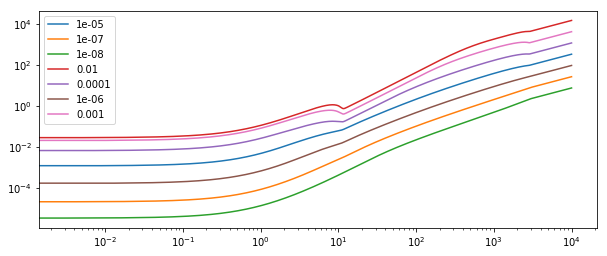

In [87]:
fig = plt.figure(1, figsize = (10,4))
ax = fig.add_subplot(111)
for A in Avals:
    Th = cosmo[str(A)].get_thermodynamics()
    ax.loglog(Th['z'],Th['Tbidm [K]'],label=str(A))
ax.legend()

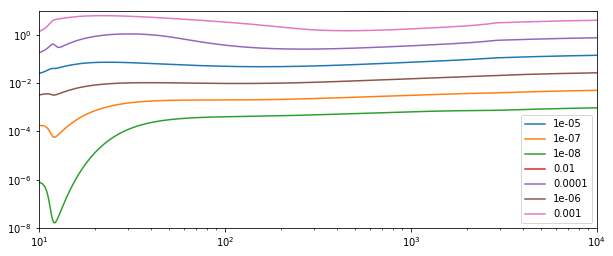

In [94]:
fig = plt.figure(1, figsize = (10,4))
ax = fig.add_subplot(111)
for a in avals:
    Th = cosmo[str(a)].get_thermodynamics()
    H = np.array([cosmo[str(a)].Hubble(zz) for zz in Th['z']])
    ax.loglog(Th['z'],(1+Th['z'])*Th['Rbidm']/H,label=str(a))
plt.xlim([10,1e4])
plt.ylim([1e-8,10])
ax.legend()

In [95]:
Avals = {1e-6,1e-5,1e-4,1e-3,1e-7,1e-8,1e-2}
cosmo = {}

for A in Avals:
    cosmo[str(A)]=Class()
    cosmo[str(A)].set({'gauge':'synchronous',
                           'output':'tCl, lCl, mPk, pCl',
                           'omega_cdm':0.12038,
                           'recombination':'recfast',
                           'h':0.67556,
                           'lensing':'yes',
                           'f_bidm':0.99,
                           'm_bidm':1000,
                           'bidm_type':'resonance',
                           'a_bidm':0.01,
                           'epsilon_bidm':3e-11,
                           'A_bidm':A,
                           'tight_coupling_trigger_tau_c_over_tau_h':0.002,
                           'tight_coupling_trigger_tau_c_over_tau_k':0.0003,
                           })
    cosmo[str(A)].compute()

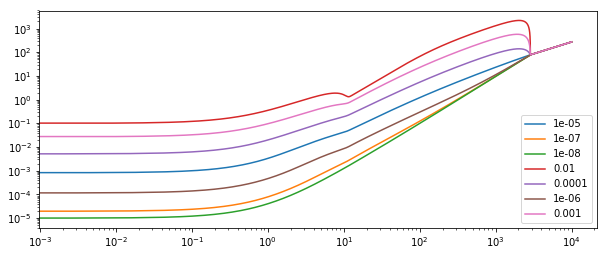

In [96]:
fig = plt.figure(1, figsize = (10,4))
ax = fig.add_subplot(111)
for A in Avals:
    Th = cosmo[str(A)].get_thermodynamics()
    ax.loglog(Th['z'],Th['Tbidm [K]'],label=str(A))
ax.legend()

In [97]:
Th001 = cosmo['0.01'].get_thermodynamics()
T001 = Th001['Tbidm [K]']
Tmax001 = max(T001)
iTmax001 = np.argmax(T001)
zeq = Th001['z'][iTmax001]

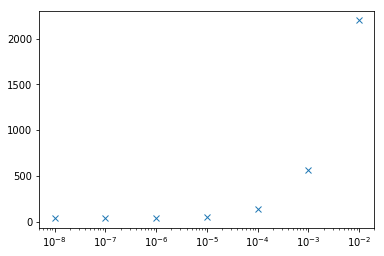

In [99]:
Teq = []
As = []
aeq = []

for A in Avals:
    Th = cosmo[str(A)].get_thermodynamics()
    Ti = interp1d(Th['z'],Th['Tbidm [K]'])
    Tbi = interp1d(Th['z'],Th['Tb [K]'])
    #print(str(A) + ' ' + str(max(Th['z'])))
    Teq += [Ti(zeq)]
    Tbi(zeq)
    aeq += [Ti(zeq)/Tbi(zeq)]
    As += [A]
plt.semilogx(As,Teq,'x')

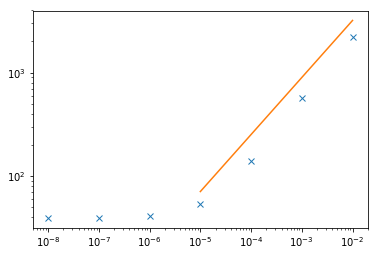

In [100]:
plt.loglog(As,Teq,'x')
AAs = np.linspace(1e-5,1e-2,100)
plt.loglog(AAs,AAs**0.55 * 4e4)

In [101]:
As.sort()
Teq.sort()
aeq.sort()

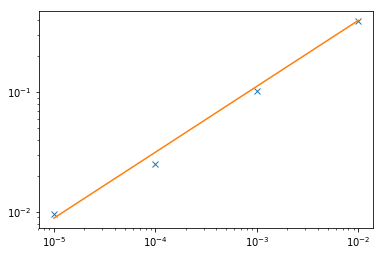

In [103]:
plt.loglog(As[3:7],aeq[3:7],'x')
AAs = np.linspace(1e-5,1e-2,100)
plt.loglog(AAs,AAs**0.55 * 5)